In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('../input/dataset.csv')
sub = pd.read_csv('../input/submission.csv')
df.head()

,WindNumber,Time,WindSpeed,Power,RotorSpeed
0,1,2017/11/1 0:20,4.188333,65.750000,5.779167
1,1,2017/11/1 0:30,4.042500,120.700000,8.636500
2,1,2017/11/1 0:40,4.137368,135.157895,8.668421
3,1,2017/11/1 0:50,4.274737,157.315789,8.727895
4,1,2017/11/1 1:00,4.108947,129.894737,8.656842


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497837 entries, 0 to 497836
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WindNumber  497837 non-null  int64  
 1   Time        497837 non-null  object 
 2   WindSpeed   497837 non-null  float64
 3   Power       497837 non-null  float64
 4   RotorSpeed  497837 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.0+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WindNumber,497837.0,6.438630,3.410932,1.000000,4.000000,6.000000,9.000000,12.00000
WindSpeed,497837.0,5.426269,2.930529,-12.510000,3.430000,5.017368,7.077143,27.28875
Power,497837.0,353.850423,495.553779,-109.538333,0.000000,154.736842,483.950000,2174.40000
RotorSpeed,497837.0,7.551928,5.116946,-0.584576,0.491765,8.785263,11.292000,35.00000


In [5]:
df1 = df.loc[df['WindNumber'] == 1, :]
df1.shape

(40727, 5)

In [7]:
df1.set_index('Time', inplace=True)
df1.shape

(40727, 4)

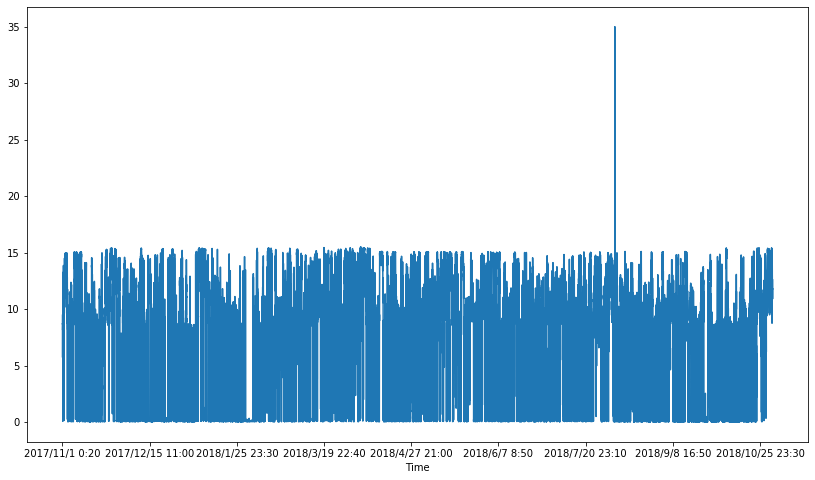

In [9]:
fig = plt.figure(figsize=(14, 8))
df1['RotorSpeed'].plot()

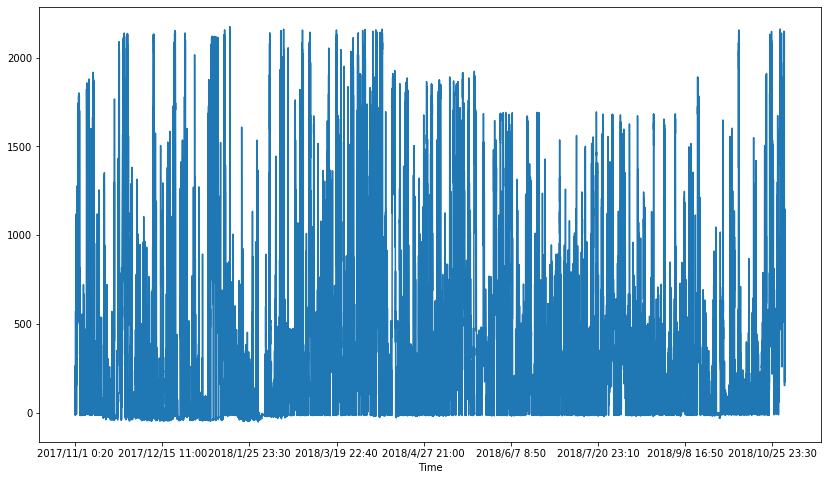

In [10]:
fig = plt.figure(figsize=(14, 8))
df1['Power'].plot()

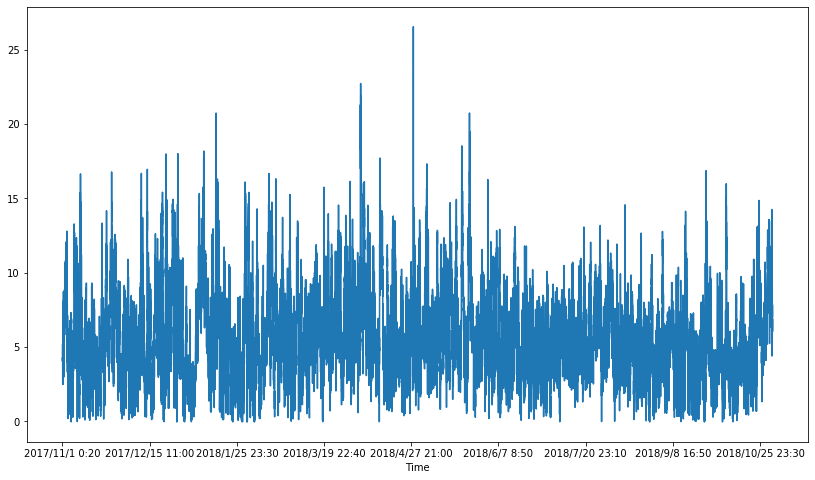

In [11]:
fig = plt.figure(figsize=(14, 8))
df1['WindSpeed'].plot()

# 箱型图

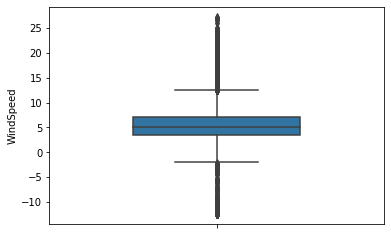

In [5]:
sns.boxplot(df['WindSpeed'], orient='v', width=0.5)

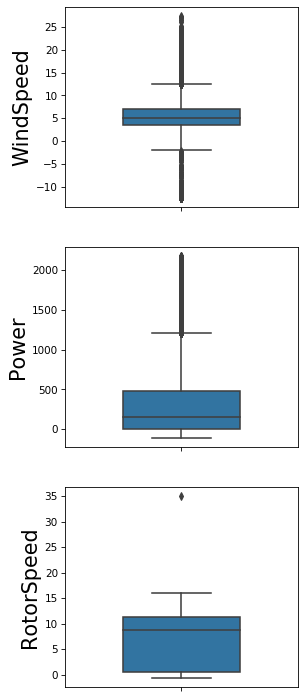

In [14]:
cols = ['WindSpeed', 'Power', 'RotorSpeed']
fig = plt.figure(figsize=(4, 12), dpi=75)
for i in range(3):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(df[cols[i]], orient='v', width=0.5)
    plt.ylabel(cols[i], fontsize=20)
plt.show()

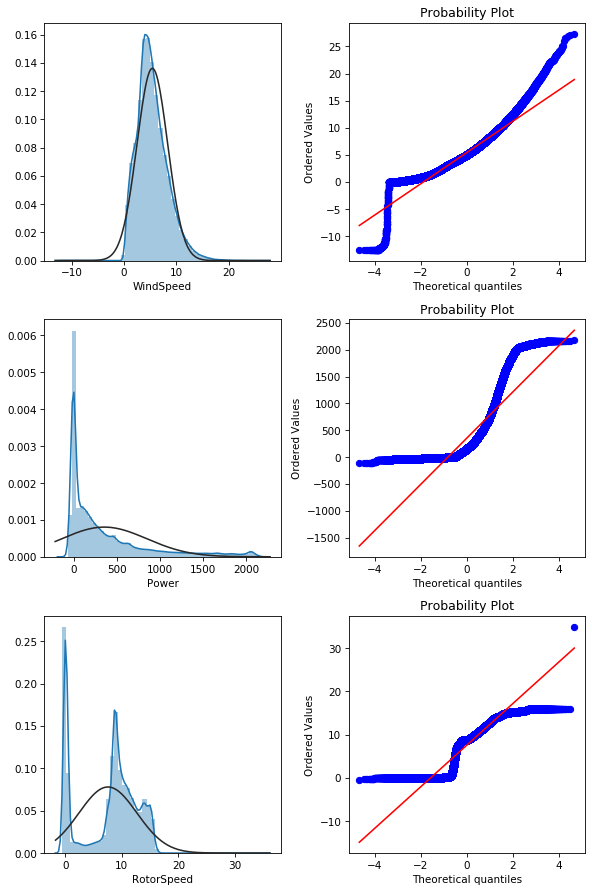

In [17]:
fig = plt.figure(figsize=(8, 12), dpi=75)
i = 0
for col in cols:
    i += 1
    ax = plt.subplot(3, 2, i)
    sns.distplot(df[col], fit=stats.norm)
    
    i += 1
    ax = plt.subplot(3, 2, i)
    res = stats.probplot(df[col], plot=plt)
plt.tight_layout()
plt.show()